

# Project: Investigate a Dataset (TMDB Movies Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project I will be analyzing the data related to TMDB movies, TMDB Movie Data contains more than 10000 movies
and specifically I will look for Top 5  movies and the relationship between revenue and other factors.
As the questions below will be addressed:

### What are the top 5 movies based on ratings?

### What kind of relationship is associated between revenue and other factors? 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
 Firstly, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_tmdbmov = pd.read_csv('tmdb-movies.csv')
df_tmdbmov.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#the data contains 21 columns and 10866 rows
df_tmdbmov.shape

(10866, 21)

In [4]:
# this step will help me to understand the data 
df_tmdbmov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# this step is to figure out missing data and after that we can clean and remove unused data
df_tmdbmov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1





## Data Cleaning (clean and remove unused data) 
 In this step I will clean and polish the data 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# first step is I will drop out the data that I will not use
df_tmdbmov.drop(['id','imdb_id','cast','homepage','director','tagline','keywords','production_companies','overview'], axis=1 , inplace = True)


In [7]:
# to check after the drop out
df_tmdbmov.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


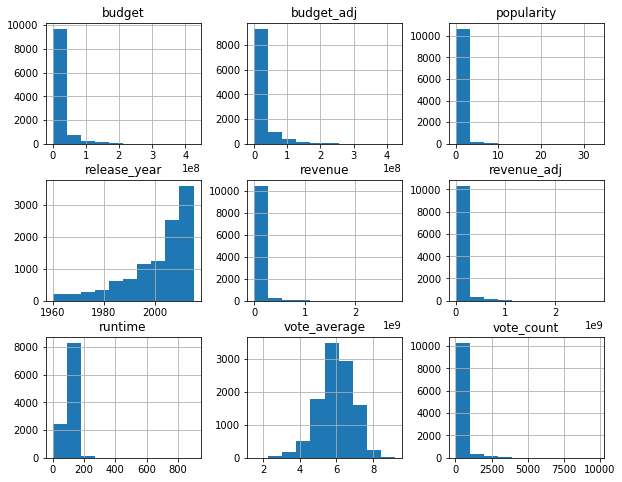

In [8]:
# these histograms can illustrate the picture more 
df_tmdbmov.hist(figsize=(10,8));

In [9]:
# below is the data after droping out the unused data
df_tmdbmov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [10]:
# geners is the only column that has a missing data, I will drop out the 23 rows to adjust the data
df_tmdbmov.dropna(inplace=True)
df_tmdbmov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [11]:
#checking for duplicated data
df_tmdbmov.duplicated().sum()

1

In [12]:
# drop duplicated data
df_tmdbmov = df_tmdbmov.drop_duplicates(keep=False)
df_tmdbmov.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 
### What are the top 5 movies based on ratings ?

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_tmdbmov = pd.read_csv('tmdb-movies.csv')
df_tmdbmov = df_tmdbmov.nlargest(5,'vote_average')
df_tmdbmov[['vote_average' , 'original_title']].head()

,vote_average,original_title
3894,9.2,The Story of Film: An Odyssey
538,8.9,The Mask You Live In
1200,8.8,Black Mirror: White Christmas
2269,8.8,Life Cycles
6911,8.7,Pink Floyd: Pulse


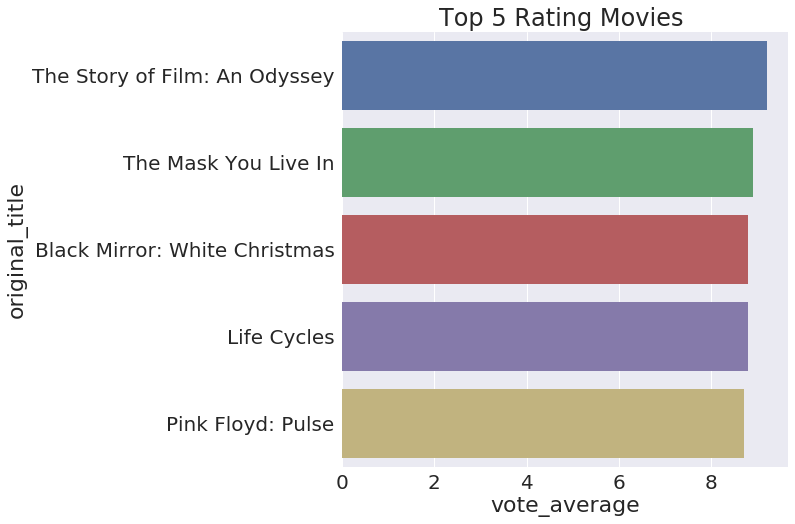

In [14]:
# after extracting the the top 5 movies I will present them visually by using pie chart
sns.set(font_scale=2);
f, ax = plt.subplots(figsize=(8, 8));
ax = sns.barplot(x='vote_average', y='original_title', data = df_tmdbmov);
plt.title('Top 5 Rating Movies ');


## Research Question 2  
### What kind of relationship is associated between revenue and other factors? 

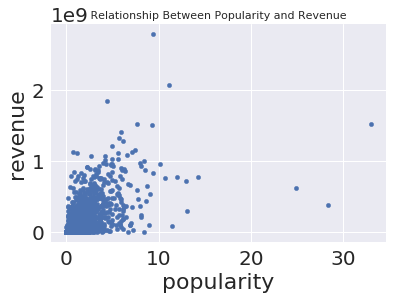

In [15]:
# plot relationship between popularity and revenue
df_tmdbmov = pd.read_csv('tmdb-movies.csv')
df_tmdbmov.head()

df_tmdbmov.plot(x='popularity', y='revenue', kind='scatter');
plt.title(' Relationship Between Popularity and Revenue ' , fontsize = 11);
#The plot shows a postivie linear between popularity and revenue which means revenue increase when the movie is popular

In [16]:
# checking the correlation value to ensure the relationship between popularity and revenue 
revenue = df_tmdbmov['revenue']
df_tmdbmov['popularity' ].corr(revenue)

0.66335836645173829

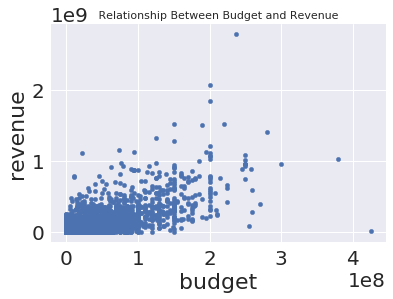

In [17]:
# plot relationship between budget and revenue
df_tmdbmov.plot(x='budget', y='revenue', kind='scatter');

plt.title(' Relationship Between Budget and Revenue ', fontsize = 11);
#The plot shows a postivie linear between bduget and revenue which means revenue increase when the movie has a high budget

In [18]:
# checking the correlation value to ensure the relationship between budget and revenue
revenue = df_tmdbmov['revenue']
df_tmdbmov['budget' ].corr(revenue)

0.73490068190761149

<a id='conclusions'></a>
## Conclusions

### Report:
After analyzing the data related to TMDB movies, TMDB Movie Data contains more than 10000 movies ,the average of the movies have a run time of 102.The Top 5 movies was extracted , and it was found that 'The Story of Film: An Odyssey' movie is the top rating movie based on avergae vote,it has a rating of 9.2 which consider a high rate.Additionally, 'Pink Floyd: Pulse' took the fifth place of top rating movies.
In the other hand,the scatter plot shows a postivie linear between popularity and revenue which means revenue increase when the movie is popular.Besides, the scatter plot of budget and revenue illustrate a positive linear relationship.The value of correlation ensure the postivie relationship between revenue and the two factors.
### Limitations :
There where a missing data that was needed to be fill in which leads me to drop some rows ,and the 'genres' and 'cast' columns contain multiple values that needs to be separated.




In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0